### Basic Operation

In [54]:
#Elementary operations
from sympy import *
x, y, z, t = symbols('x y z t')
k, m, n = symbols('k m n', integer=True)
f, g, h = map(Function, 'fgh')

In [55]:
#Construct a symbolic expression
Rational(3,2)*pi + exp(I*x) / (x**2 + y)

3*pi/2 + exp(I*x)/(x**2 + y)

In [56]:
#Evaluate a symbolic expression
x = Symbol('x')
exp(I*x).subs(x,pi).evalf() 

-1.00000000000000

In [58]:
#Deconstruct an expression
expr = x + 2*y
expr.__class__

sympy.core.add.Add

In [59]:
expr.args

(x, 2*y)

In [60]:
#Calculate a numerical value
exp(pi * sqrt(163)).evalf(50)

262537412640768743.99999999999925007259719818568888

In [63]:
#Calculate latex representation for expression
#Supressing Evaluation
latex(S('2*4+10',evaluate=False))

'2 \\cdot 4 + 10'

In [64]:
#Allowing Evaluation
latex('exp(x*2)/2')

'exp(x*2)/2'

In [65]:
#Algebra

In [67]:
#Expand products and powers
((x+y)**2 * (x+1)).expand()

x**3 + 2*x**2*y + x**2 + x*y**2 + 2*x*y + y**2

In [68]:
#Simplify a formula
a = 1/x + (x*sin(x) - 1)/x
simplify(a)

sin(x)

In [69]:
#Solve a polynomial equation
solve(Eq(x**3 + 2*x**2 + 4*x + 8, 0), x)

[-2, -2*I, 2*I]

In [70]:
solve(x**3 + 2*x**2 + 4*x + 8, x)

[-2, -2*I, 2*I]

In [71]:
#Solve an equation system
solve([Eq(x + 5*y, 2), Eq(-3*x + 6*y, 15)], [x, y])

{x: -3, y: 1}

In [72]:
solve([x + 5*y - 2, -3*x + 6*y - 15], [x, y])

{x: -3, y: 1}

In [73]:
#Solve a recurrence relation
f=Function('f')
var('y')

y

In [74]:
var('n',integer=True)

n

In [75]:
f=y(n)-2*y(n-1)-5*y(n-2)
rsolve(f,y(n),[1,4])

(1/2 + sqrt(6)/4)*(1 + sqrt(6))**n + (-sqrt(6) + 1)**n*(-sqrt(6)/4 + 1/2)

In [76]:
#Calculate a sum
a, b = symbols('a b')
s = Sum(6*n**2 + 2**n, (n, a, b))
s

Sum(2**n + 6*n**2, (n, a, b))

In [77]:
s.doit()

-2**a + 2**(b + 1) - 2*a**3 + 3*a**2 - a + 2*b**3 + 3*b**2 + b

In [79]:
#Calculate a product
product(n*(n+1), (n, 1, b))

RisingFactorial(2, b)*factorial(b)

In [80]:
#Solve a functional equation
f=Function('f')
ex=Eq(f(1/x)-3*f(x),x)
ex.subs(x,2)

Eq(f(1/2) - 3*f(2), 2)

In [81]:
ex.subs(x,Rational(1,2))

Eq(-3*f(1/2) + f(2), 1/2)

In [82]:
solve([f(Rational(1,2))-3*f(2)-2,-3*f(Rational(1,2))+f(2)-Rational(1,2)])

[{f(1/2): -7/16, f(2): -13/16}]

In [83]:
#Calculus
#Calculate a limit
limit((sin(x)-x)/x**3, x, 0)

-1/6

In [84]:
(1/cos(x)).series(x, 0, 6)

1 + x**2/2 + 5*x**4/24 + O(x**6)

In [86]:
#Calculate a derivative
diff(cos(x**2)**2 / (1+x), x)

-4*x*sin(x**2)*cos(x**2)/(x + 1) - cos(x**2)**2/(x + 1)**2

In [87]:
#Calculate an integral
integrate(x**2 * cos(x), x)

x**2*sin(x) + 2*x*cos(x) - 2*sin(x)

In [88]:
integrate(x**2 * cos(x), (x, 0, pi/2))

-2 + pi**2/4

In [89]:
#Solve an ordinary differential equation
f = Function('f')
dsolve(Eq(Derivative(f(x),x,x) + 9*f(x), 1), f(x))

Eq(f(x), C1*sin(3*x) + C2*cos(3*x) + 1/9)

In [90]:
f = Function("f")
Eq(f(x).diff(x, x) + 9*f(x), 1)

Eq(9*f(x) + Derivative(f(x), x, x), 1)

In [91]:
dsolve(_, f(x))

Eq(f(x), C1*sin(3*x) + C2*cos(3*x) + 1/9)

### Symbolic computing

In [93]:
from sympy import (
         symbols,   # define symbols for symbolic math
         diff,      # differentiate expressions
         integrate, # integrate expressions
         Rational,  # define rational numbers
         lambdify,  # turn symbolic expr. into Python functions
         )
t, v0, g = symbols('t v0 g')
y = v0*t - Rational(1,2)*g*t**2
dydt = diff(y, t)
dydt

-g*t + v0

In [95]:
print('acceleration:', diff(y, t, t))  # 2nd derivative

acceleration: -g


In [96]:
y2 = integrate(dydt, t)
y2

-g*t**2/2 + t*v0

In [142]:
v = lambdify([t, v0, g],dydt)      # arguments in v
# symbolic expression
v(2, 5, 9.81)

-14.620000000000001

In [143]:
5 - 9.81*2  # control the previous calculation

-14.620000000000001

In [133]:
#Taylor series and more
from sympy import exp, sin, cos
f = exp(t)
f.series(t, 0, 3)

1 + t + t**2/2 + O(t**3)

In [134]:
f = exp(sin(t))
f.series(t, 0, 8)

1 + t + t**2/2 - t**4/8 - t**5/15 - t**6/240 + t**7/90 + O(t**8)

In [135]:
#Output of mathematical expressions in the LaTeX typesetting system
from sympy import latex
print(latex(f.series(t, 0, 7)))

1 + t + \frac{t^{2}}{2} - \frac{t^{4}}{8} - \frac{t^{5}}{15} - \frac{t^{6}}{240} + \mathcal{O}\left(t^{7}\right)


In [136]:
#simplifying expressions
from sympy import simplify, expand
x, y = symbols('x y')
f = -sin(x)*sin(y) + cos(x)*cos(y)
simplify(f)

cos(x + y)

In [109]:
expand(sin(x+y), trig=True)  # requires a trigonometric hint

sin(x)*cos(y) + sin(y)*cos(x)

###  Taylor series for sine function

In [112]:
import sympy as sy
import numpy as np
from sympy.functions import sin,cos
import matplotlib.pyplot as plt

In [113]:
plt.style.use("ggplot")

In [114]:
# Define the variable and the function to approximate
x = sy.Symbol('x')
f = sin(x)

In [115]:
# Factorial function
def factorial(n):
    if n <= 0:
        return 1
    else:
        return n*factorial(n-1)

In [116]:
# Taylor approximation at x0 of the function 'function'
def taylor(function,x0,n):
    i = 0
    p = 0
    while i <= n:
        p = p + (function.diff(x,i).subs(x,x0))/(factorial(i))*(x-x0)**i
        i += 1
    return p

Taylor expansion at n=1 x
Taylor expansion at n=3 -x**3/6 + x
Taylor expansion at n=5 x**5/120 - x**3/6 + x
Taylor expansion at n=7 -x**7/5040 + x**5/120 - x**3/6 + x
Taylor expansion at n=9 x**9/362880 - x**7/5040 + x**5/120 - x**3/6 + x


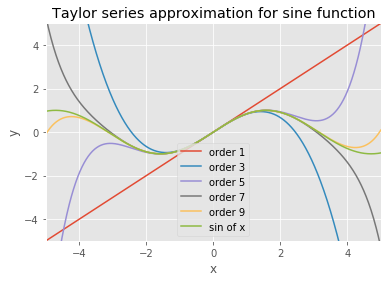

In [117]:
# Plot results
def plot():
    x_lims = [-5,5]
    x1 = np.linspace(x_lims[0],x_lims[1],800)
    y1 = []
    # Approximate up until 10 starting from 1 and using steps of 2
    for j in range(1,10,2):
        func = taylor(f,0,j)
        print('Taylor expansion at n='+str(j),func)
        for k in x1:
            y1.append(func.subs(x,k))
        plt.plot(x1,y1,label='order '+str(j))
        y1 = []
    # Plot the function to approximate (sine, in this case)
    plt.plot(x1,np.sin(x1),label='sin of x')
    plt.xlim(x_lims)
    plt.ylim([-5,5])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.title('Taylor series approximation for sine function')
    plt.show()

plot()

### Basic Introduction
#### Numerical Integration of ODEs using SciPy

consider the scalar ODE y'( x ) = f ( x , y ( x ) ) = x + y ( x )^2 .
To be able to plot the direction field for this ODE, a specific solution obtained
by numerical integration using odeint, we first define the SymPy symbols required to construct a symbolic
expression for f (x, y(x)):


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import sympy

In [3]:
x = sympy.symbols("x")
y = sympy.Function("y")
f = y(x)**2 + x

From the SymPy expression f, we can
generate such a function using sympy.lambdify with the 'numpy' argument 6 :

In [4]:
f_np = sympy.lambdify((y(x), x), f)

In [5]:
f_np

<function numpy.<lambda>>

Now that we have set up the ODE
function f_np, initial value y0, and array of x coordination, for example xp, we can integrate the ODE
problem by calling integrate.odeint(f_np, y0, xp):

In [6]:
y0=0
xp=np.linspace(0, 1.9, 100)
yp=integrate.odeint(f_np, y0, xp)
xm=np.linspace(0, -5, 100)
ym=integrate.odeint(f_np, y0, xm)

In [11]:
def plot_direction_field(x, y_x, f_xy, x_lim=(-5, 5), y_lim=(-5, 5), ax=None):
        f_np = sympy.lambdify((x, y_x), f_xy, 'numpy')

        x_vec = np.linspace(x_lim[0], x_lim[1], 20)

        y_vec = np.linspace(y_lim[0], y_lim[1], 20)


        if ax is None:

                _, ax = plt.subplots(figsize=(4, 4))


        dx = x_vec[1] - x_vec[0]

        dy = y_vec[1] - y_vec[0]


        for m, xx in enumerate(x_vec):

                for n, yy in enumerate(y_vec):

                        Dy = f_np(xx, yy) * dx

                        Dx = 0.8 * dx**2 / np.sqrt(dx**2 + Dy**2)

                        Dy = 0.8 * Dy*dy / np.sqrt(dx**2 + Dy**2)

                        ax.plot([xx - Dx/2, xx + Dx/2],

                        [yy - Dy/2, yy + Dy/2], 'b', lw=0.5)

        ax.axis('tight')

        ax.set_title(r"$%s$" %

                        (sympy.latex(sympy.Eq(y(x).diff(x), f_xy))),

                                                        fontsize=18)

        return ax

Note:The results are two one-dimensional NumPy arrays ym and yp, of the same length as the corresponding
coordinate arrays xm and xp (that is, 100), which contain the solution to the ODE problem at the specified
points. To visualize the solution, we next plot the ym and yp arrays together with the direction field for the
ODE.

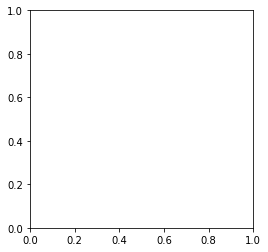

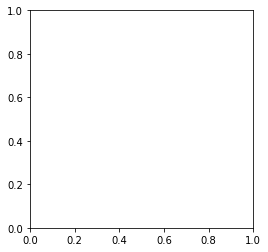

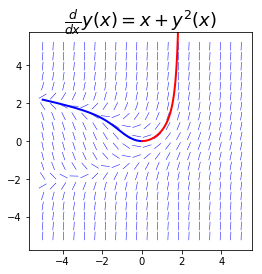

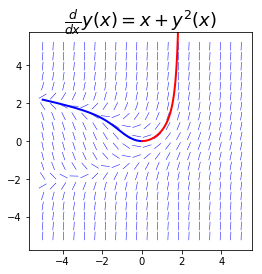

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
plot_direction_field(x, y(x), f, ax=ax)
ax.plot(xm, ym, 'b', lw=2)
ax.plot(xp, yp, 'r', lw=2)
plt.show()

To solve this problem with odeint, we first need to write a function for the right-hand side of the ODE in
vector form. For this case we have f(t , [ x , y ]^T)= [ ax - bxy , cxy - dy ]^T , which we can implement as a  Python function in the following way:

In [14]:
a, b, c, d = 0.4, 0.002, 0.001, 0.7
def f(xy, t):
        x, y = xy
        return [a * x - b * x * y, c * x * y - d * y]

In [15]:
#Here we use the initial conditions x ( 0 ) = 600 and y ( 0 ) = 400 , which corresponds to
#600 prey animals and 400 predators at the beginning of the simulation.
xy0 = [600, 400]
t = np.linspace(0, 50, 250)
xy_t = integrate.odeint(f, xy0, t)
xy_t.shape

(250, 2)

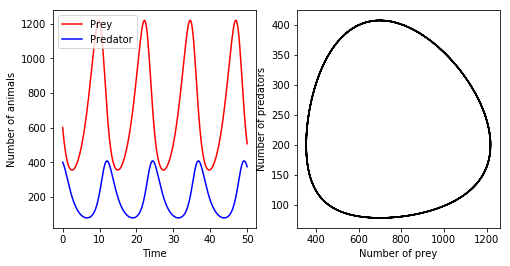

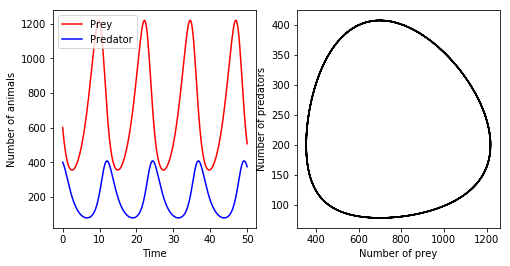

In [17]:
#The following code plots the solution as a function of time and in phase space
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].plot(t, xy_t[:,0], 'r', label="Prey")
axes[0].plot(t, xy_t[:,1], 'b', label="Predator")
axes[0].set_xlabel("Time")
axes[0].set_ylabel("Number of animals")
axes[0].legend()
axes[1].plot(xy_t[:,0], xy_t[:,1], 'k')
axes[1].set_xlabel("Number of prey")
axes[1].set_ylabel("Number of predators")
plt.show()

In [18]:
#implementation of f, the three arguments sigma, rho, and beta, for the correspondingly 
#named parameters, have been added after the mandatory y(t) and t arguments:
def f(xyz, t, sigma, rho, beta):
            x, y, z = xyz
            return [sigma * (y - x),x * (rho - z) - y,x * y - beta * z]

In [19]:
#the array with t values to compute the solution for, 
#and the initial conditions for the functions x(t), y(t), and z(t).
sigma, rho, beta = 8, 28, 8/3.0
t = np.linspace(0, 25, 10000)
xyz0 = [1.0, 1.0, 1.0]

In [20]:
#we pass a tuple with the values of these parameters via the args argument
#when calling integrate.odeint. In the following we solve the ODE for three different
#set of parameters (but same initial conditions).

xyz1 = integrate.odeint(f, xyz0, t, args=(sigma, rho, beta))
xyz2 = integrate.odeint(f, xyz0, t, args=(sigma, rho, 0.6*beta))
xyz3 = integrate.odeint(f, xyz0, t, args=(2*sigma, rho, 0.6*beta))

* The solutions are stored in the NumPy arrays xyz1, xyz2, and xyz3. In this case these arrays have the
shape (10000, 3), because the t array have 10000 elements and there are three unknown functions in the
ODE problem. The three solutions are plotted in 3D graphs in the following code, and the result is shown in
Figure 9-6. With small changes in the system parameters, the resulting solutions can vary greatly.

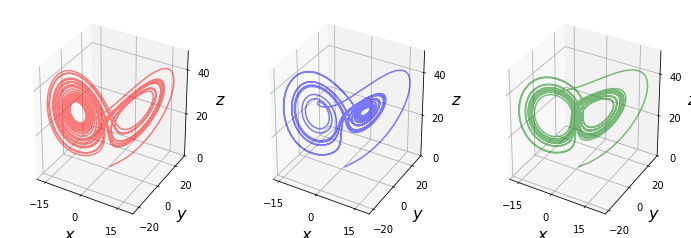

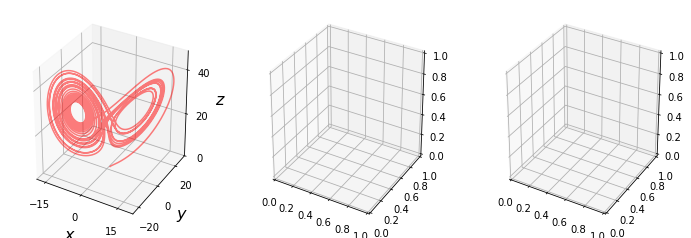

In [22]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(12, 4),subplot_kw={'projection':'3d'})
for ax, xyz, c in [(ax1, xyz1, 'r'), (ax2, xyz2, 'b'), (ax3, xyz3, 'g')]:
        ax.plot(xyz[:,0], xyz[:,1], xyz[:,2], c, alpha=0.5)
        ax.set_xlabel('$x$', fontsize=16)
        ax.set_ylabel('$y$', fontsize=16)
        ax.set_zlabel('$z$', fontsize=16)
        ax.set_xticks([-15, 0, 15])
        ax.set_yticks([-20, 0, 20])
        ax.set_zticks([0, 20, 40])
        plt.show()

In [24]:
#write a Python function that implements the function f (t, y(t)) 
#as below, which The return value of the function f is a list of length four, 
#whose elements are the derivatives of the ODE
#functions y0 (t) to y3 (t).

def f(t, y, args):
        m1, k1, g1, m2, k2, g2 = args
        return [y[1], - k1/m1 * y[0] + k2/m1 * (y[2] - y[0]) - g1/m1 * y[1],
                            y[3], - k2/m2 * (y[2] - y[0]) - g2/m2 * y[3]]

In [25]:
#Now we compute the solution to the ODE, t.
m1, k1, g1 = 1.0, 10.0, 0.5
m2, k2, g2 = 2.0, 40.0, 0.25
args = (m1, k1, g1, m2, k2, g2)
y0 = [1.0, 0, 0.5, 0]
t = np.linspace(0, 20, 1000)

In [26]:
#create an instance of the class integrate.ode,
#passing the ODE function f as an argument
r = integrate.ode(f)

In [27]:
#set the initial state and the parameters to the function f
r.set_integrator('lsoda');
r.set_initial_value(y0, t[0]);
r.set_f_params(args);

In [28]:
#keeping track of which point to integrate to
dt = t[1] - t[0]
y = np.zeros((len(t), len(y0)))
idx = 0
while r.successful() and r.t < t[-1]:
        y[idx, :] = r.y
        r.integrate(r.t + dt)
        idx += 1

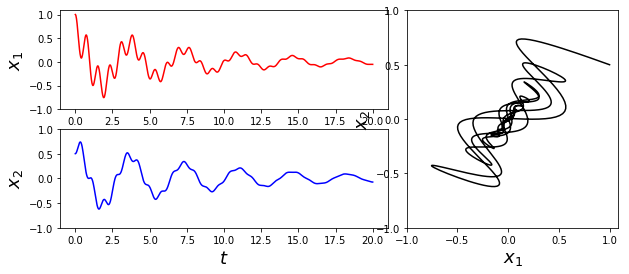

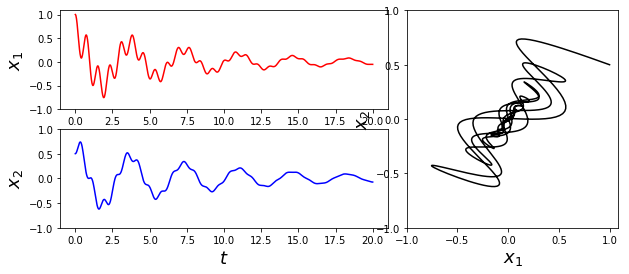

In [30]:
#Plotting
fig = plt.figure(figsize=(10, 4))
ax1 = plt.subplot2grid((2, 5), (0, 0), colspan=3)
ax2 = plt.subplot2grid((2, 5), (1, 0), colspan=3)
ax3 = plt.subplot2grid((2, 5), (0, 3), colspan=2, rowspan=2)
# x_1 vs time plot
ax1.plot(t, y[:, 0], 'r')
ax1.set_ylabel('$x_1$', fontsize=18)
ax1.set_yticks([-1, -.5, 0, .5, 1])
# x2 vs time plot
ax2.plot(t, y[:, 2], 'b')
ax2.set_xlabel('$t$', fontsize=18)
ax2.set_ylabel('$x_2$', fontsize=18)
ax2.set_yticks([-1, -.5, 0, .5, 1])
# x1 and x2 phase space plot
ax3.plot(y[:, 0], y[:, 2], 'k')
ax3.set_xlabel('$x_1$', fontsize=18)
ax3.set_ylabel('$x_2$', fontsize=18)
ax3.set_xticks([-1, -.5, 0, .5, 1])
ax3.set_yticks([-1, -.5, 0, .5, 1])
plt.show()

In [31]:
# Define a Jacobian function jac takes additional arguments
def jac(t, y, args):
        m1, k1, g1, m2, k2, g2 = args
        return [[0, 1, 0, 0],
                [- k1/m2 - k2/m1, - g1/m1 * y[1], k2/m1, 0],[0, 0, 1, 0],[k2/m2, 0, - k2/m2, - g2/m2]]
r = integrate.ode(f, jac)
r.set_jac_params(args);

In [32]:
#defining SymPy symbols for the variables and the functions for a particular problem
t, g, m1, l1, m2, l2 = sympy.symbols("t, g, m_1, l_1, m_2, l_2")
theta1, theta2 = sympy.symbols("theta_1, theta_2", cls=sympy.Function)
ode1 = sympy.Eq((m1+m2)*l1 * theta1(t).diff(t,t) 
                    +m2*l2 * theta2(t).diff(t,t) +m2*l2 * theta2(t).diff(t)**2 * sympy.sin(theta1(t)-theta2(t))
                    +g*(m1+m2) * sympy.sin(theta1(t)))
ode1

Eq(g*(m_1 + m_2)*sin(theta_1(t)) + l_1*(m_1 + m_2)*Derivative(theta_1(t), t, t) + l_2*m_2*sin(theta_1(t) - theta_2(t))*Derivative(theta_2(t), t)**2 + l_2*m_2*Derivative(theta_2(t), t, t), 0)

In [33]:
#Defining ODE2
ode2 = sympy.Eq(m2*l2 * theta2(t).diff(t,t) +m2*l1 * theta1(t).diff(t,t) * sympy.cos(theta1(t)-theta2(t))
                -m2*l1 * theta1(t).diff(t)**2 * sympy.sin(theta1(t) - theta2(t)) +m2*g * sympy.sin(theta2(t)))

ode2

Eq(g*m_2*sin(theta_2(t)) - l_1*m_2*sin(theta_1(t) - theta_2(t))*Derivative(theta_1(t), t)**2 + l_1*m_2*cos(theta_1(t) - theta_2(t))*Derivative(theta_1(t), t, t) + l_2*m_2*Derivative(theta_2(t), t, t), 0)

In [34]:
#use the SymPy function subs to perform the substitution using this dictionary
y1, y2, y3, y4 = sympy.symbols("y_1, y_2, y_3, y_4", cls=sympy.Function)
varchange = {theta1(t).diff(t, t): y2(t).diff(t),
                theta1(t): y1(t),
                theta2(t).diff(t, t): y4(t).diff(t),
                theta2(t): y3(t)}
ode1_vc = ode1.subs(varchange)
ode2_vc = ode2.subs(varchange)

In [35]:
#More ODE introduced
ode3 = y1(t).diff(t) - y2(t)
ode4 = y3(t).diff(t) - y4(t)

In [36]:
#Obtained ODEs into standard form
y = sympy.Matrix([y1(t), y2(t), y3(t), y4(t)])
vcsol = sympy.solve((ode1_vc, ode2_vc, ode3, ode4), y.diff(t), dict=True)
f = y.diff(t).subs(vcsol[0])

In [37]:
#converting it into Numpy aware function that can be used to integrate.odeint
params = {m1: 5.0, l1: 2.0, m2: 1.0, l2: 1.0, g: 10.0}
f_np = sympy.lambdify((t, y), f.subs(params), 'numpy')
jac = sympy.Matrix([[fj.diff(yi) for yi in y] for fj in f])
jac_np = sympy.lambdify((t, y), jac.subs(params), 'numpy')

In [38]:
#solving ODE by using integrate.ode
y0 = [2.0, 0, 0, 0]
t = np.linspace(0, 20, 1000)
r = integrate.ode(f_np, jac_np).set_initial_value(y0, t[0])
dt = t[1] - t[0]
y = np.zeros((len(t), len(y0)))
idx = 0
while r.successful() and r.t < t[-1]:
        y[idx, :] = r.y
        r.integrate(r.t + dt)
        idx += 1

In [39]:
#Solution of ODE is now store in array
theta1_np, theta2_np = y[:, 0], y[:, 2]
x1 = params[l1] * np.sin(theta1_np)
y1 = -params[l1] * np.cos(theta1_np)
x2 = x1 + params[l2] * np.sin(theta2_np)
y2 = y1 - params[l2] * np.cos(theta2_np)

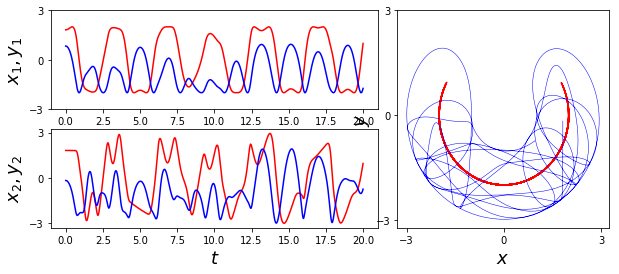

In [41]:
#Plotting
fig=plt.figure(figsize=(10, 4))
ax1=plt.subplot2grid((2, 5), (0, 0), colspan=3)
ax2=plt.subplot2grid((2, 5), (1, 0), colspan=3)
ax3=plt.subplot2grid((2, 5), (0, 3), colspan=2, rowspan=2)
ax1.plot(t, x1, 'r')
ax1.plot(t, y1, 'b')
ax1.set_ylabel('$x_1, y_1$', fontsize=18)
ax1.set_yticks([-3, 0, 3])
ax2.plot(t, x2, 'r')
ax2.plot(t, y2, 'b')
ax2.set_xlabel('$t$', fontsize=18)
ax2.set_ylabel('$x_2, y_2$', fontsize=18)
ax2.set_yticks([-3, 0, 3])
ax3.plot(x1, y1, 'r')
ax3.plot(x2, y2, 'b', lw=0.5)
ax3.set_xlabel('$x$', fontsize=18)
ax3.set_ylabel('$y$', fontsize=18)
ax3.set_xticks([-3, 0, 3])
ax3.set_yticks([-3, 0, 3])
plt.show()

### Solving ODEs using Laplace Transformations

In [42]:
#Creating a sympy symbols for independent variables and function for given ODE
t = sympy.symbols("t", positive=True)
y = sympy.Function("y")
ode = y(t).diff(t, 2) + 2 * y(t).diff(t) + 10 * y(t) - 2 * sympy.sin(3*t)
sympy.Eq(ode)

Eq(10*y(t) - 2*sin(3*t) + 2*Derivative(y(t), t) + Derivative(y(t), t, t), 0)

In [43]:
#Creating a synbols s,Y which to be used in the Laplace transformation(LT)
s, Y = sympy.symbols("s, Y", real=True)

In [44]:
#proceed to LT to unknown function
L_y = sympy.laplace_transform(y(t), t, s)
L_y

LaplaceTransform(y(t), t, s)

In [45]:
#Laplace-transformed ODE and performs the substitution of 
#the unevaluated Laplace transforms of the derivatives of y(t)
L_ode = sympy.laplace_transform(ode, t, s, noconds=True)
sympy.Eq(L_ode)

Eq(10*LaplaceTransform(y(t), t, s) + 2*LaplaceTransform(Derivative(y(t), t), t, s) + LaplaceTransform(Derivative(y(t), t, t), t, s) - 6/(s**2 + 9), 0)

In [47]:
#  Evaluate the unevaluted laplace transforms of derivatives of functions
def laplace_transform_derivatives(e):

        if isinstance(e, sympy.LaplaceTransform):
                if isinstance(e.args[0], sympy.Derivative):
                        d, t, s = e.args
                        n = len(d.args) - 1
                        return ((s**n) * sympy.LaplaceTransform(d.args[0], t, s) -
                                        sum([s**(n-i) * sympy.diff(d.args[0], t, i-1).subs(t, 0)
                                                for i in range(1, n+1)]))
        if isinstance(e, (sympy.Add, sympy.Mul)):
            t = type(e)
            return t(*[laplace_transform_derivatives(arg) for arg in e.args])
        return e

In [48]:
#
L_ode_2 = laplace_transform_derivatives(L_ode)
sympy.Eq(L_ode_2)

Eq(s**2*LaplaceTransform(y(t), t, s) + 2*s*LaplaceTransform(y(t), t, s) - s*y(0) + 10*LaplaceTransform(y(t), t, s) - 2*y(0) - Subs(Derivative(y(t), t), (t,), (0,)) - 6/(s**2 + 9), 0)

In [49]:
#Apply function on LT on ODE equations
L_ode_3 = L_ode_2.subs(L_y, Y)
sympy.Eq(L_ode_3)

Eq(Y*s**2 + 2*Y*s + 10*Y - s*y(0) - 2*y(0) - Subs(Derivative(y(t), t), (t,), (0,)) - 6/(s**2 + 9), 0)

In [50]:
#Simplify notation
ics = {y(0): 1, y(t).diff(t).subs(t, 0): 0}
ics

{y(0): 1, Subs(Derivative(y(t), t), (t,), (0,)): 0}

In [51]:
L_ode_4 = L_ode_3.subs(ics)
sympy.Eq(L_ode_4)

Eq(Y*s**2 + 2*Y*s + 10*Y - s - 2 - 6/(s**2 + 9), 0)

In [52]:
#Algebraic equation solve for Y
Y_sol = sympy.solve(L_ode_4, Y)
Y_sol

[(s**3 + 2*s**2 + 9*s + 24)/(s**4 + 2*s**3 + 19*s**2 + 18*s + 90)]

In [53]:
#Laplace transformation on this expression gives the solution to the original problem in the time domain
y_sol = sympy.inverse_laplace_transform(Y_sol[0], s, t)
sympy.simplify(y_sol)

(6*exp(t)*sin(3*t) - 36*exp(t)*cos(3*t) + 43*sin(3*t) + 147*cos(3*t))*exp(-t)/111